In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
def bootstrap(sample,runs):
    ls = []
    n = sample.shape[0]
    for _ in range(runs):
        sum = 0
        for i in range(n):
            r = np.floor(np.random.random()*n)
            sum += sample[r]
        ls.append(sum/n)
    plt.hist(ls,bins = 100)
    ls.sort()
    return ls
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

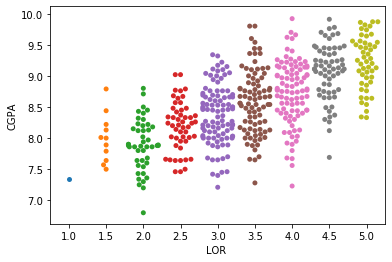

In [4]:
sns.swarmplot(y = 'CGPA',x = 'LOR ',data = gradAd)

In [5]:
mid = gradAd['CGPA'].groupby(gradAd['LOR ']).mean()
mid.index = range(mid.shape[0])
mid

0    7.340000
1    7.998182
2    7.895652
3    8.196000
4    8.372020
5    8.583023
6    8.735000
7    9.064921
8    9.215000
Name: CGPA, dtype: float64

In [1]:
ls = []
lb = []
hb = []
for i in range(2,11):
    temp = gradAd['CGPA'][gradAd['LOR ']==i/2]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp,5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

NameError: name 'gradAd' is not defined

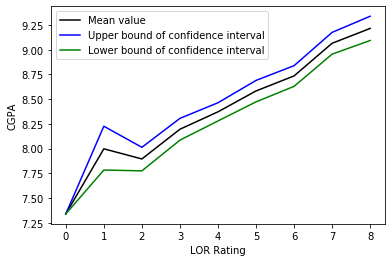

In [7]:
plt.xlabel('LOR Rating')
plt.ylabel('CGPA')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

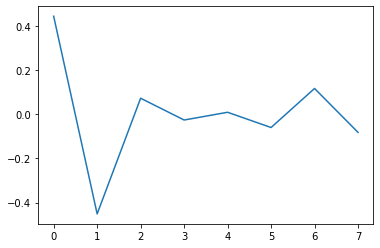

In [8]:
error = []
for i in range(len(lb)-1):
    error.append(lb[i+1]-hb[i])
plt.plot(error)

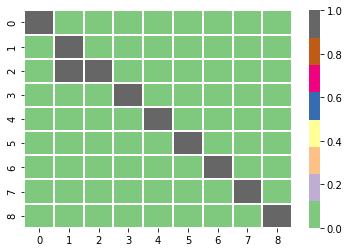

In [20]:
arr = np.zeros((9,9))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)